# Problem Statement

Build a sentiment analysis model to analyze customer reviews and feedback for a hospitality company.The model should be able to classify the reviews as positive, negative, or neutral and identify key topics for actionable insights, streamlining feedback analysis.

## Objective

Develop a robust machine learning solution for sentiment analysis of hospitality reviews, accurately categorizing them into positive, negative, and neutral classes. facilitating informed decision-making and service enhancement.

# **Introduction**

##### Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. This is usually used on social media posts and customer reviews in order to automatically understand if some users are positive or negative and why. The goal of this study is to show how sentiment analysis can be performed using python.

### Import the required Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import autocorrect
from nltk.stem import PorterStemmer,WordNetLemmatizer
from tqdm import tqdm

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tempfile import mkdtemp
from shutil import rmtree



from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
import os
import joblib
from joblib import Memory
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
df = pd.read_csv(r"tripadvisor_hotel_reviews.csv")

In [3]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
df.tail()   #Last five rows

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [6]:
df.shape   #no.of rows and cols

(20491, 2)

In [7]:
df.columns   #cols names

Index(['Review', 'Rating'], dtype='object')

#### df.columns() gives us the names of the columsn and the data types of the data present inside the column

In [8]:
df.describe ()         #description about the dat

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


#### df.describe() gives the descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [9]:
df.info()   #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


#### df.info() gives us the information regarding the null values, num of rows and also the data type of the particular row

In [10]:
df.duplicated().sum() # gives us the number of duplicated values

0

In [11]:
# Check for missing values
print(df.isnull().sum())

Review    0
Rating    0
dtype: int64


## Value Mapping

In [12]:
df['Rating'].unique()

array([4, 2, 3, 5, 1])

In [13]:
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}

df['Sentiment'] =df['Rating'].map(sentiment_mapping)

In [14]:
df

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive
20487,great location price view hotel great quick pl...,4,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative


In [15]:
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


In [16]:
df['Review'] = df['Review'].str.replace('*', '')

## Data Visualization

### Distribution Analysis

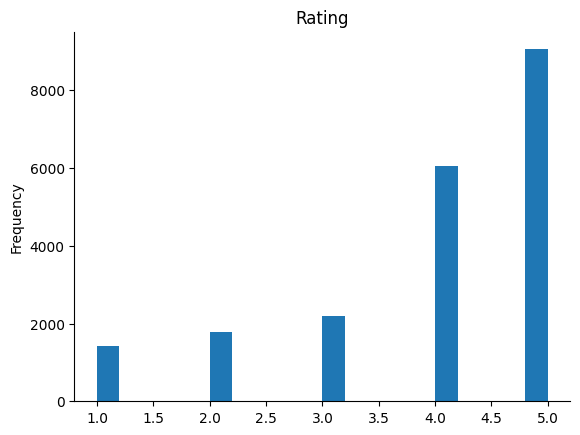

In [17]:
from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

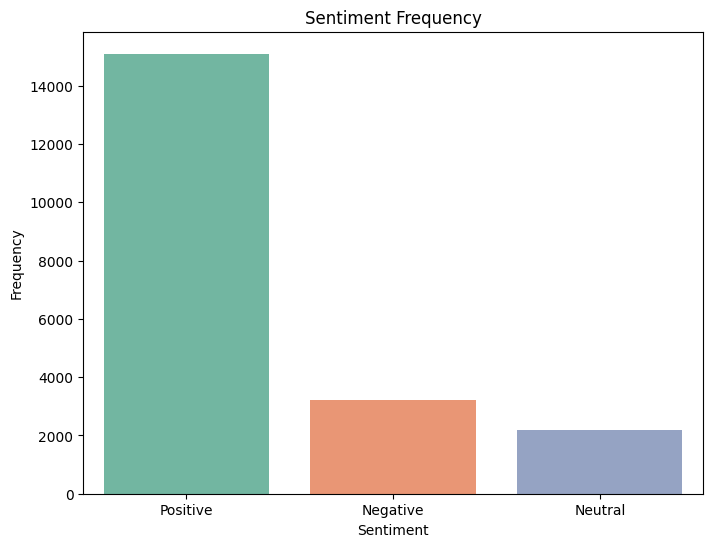

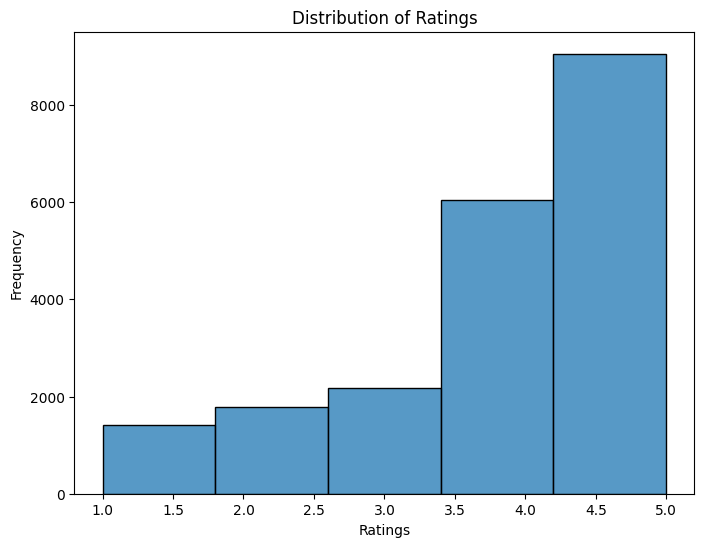

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Frequency')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In the given dataset there are more reviewers who have given rating as 4 and 5.

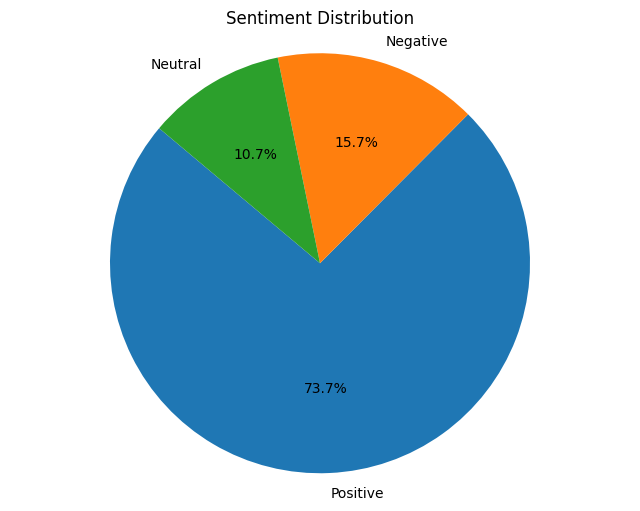

In [19]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

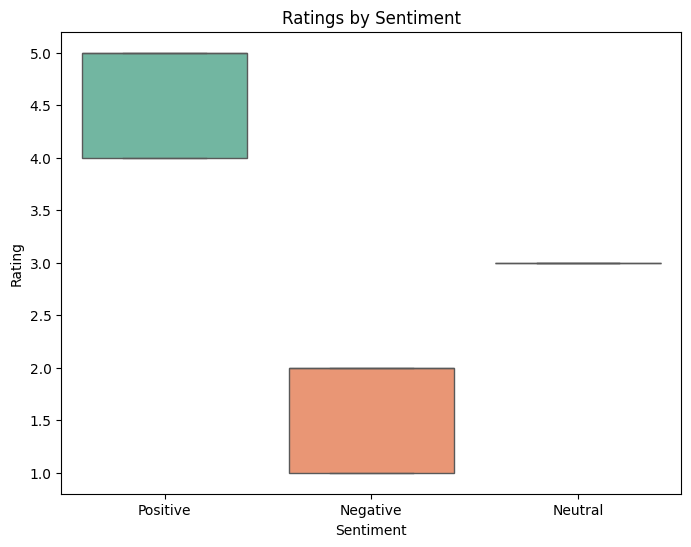

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Rating', data=df, palette='Set2')
plt.title('Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


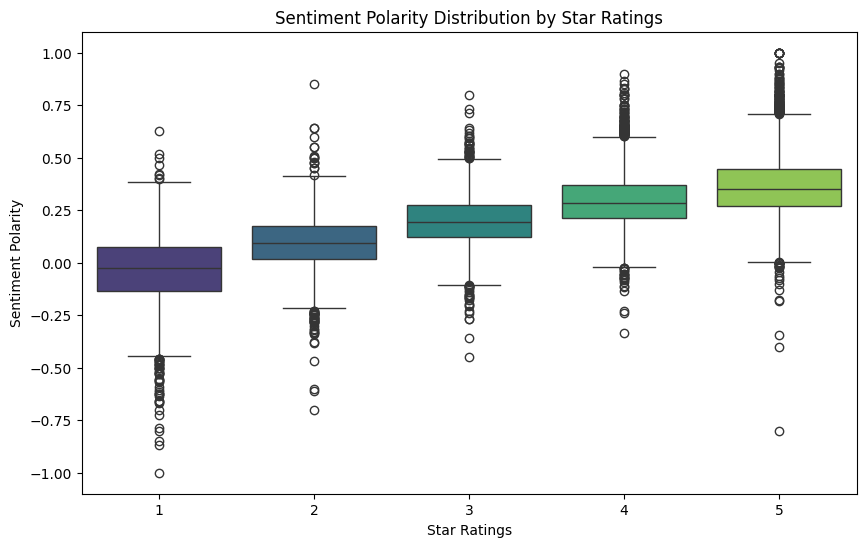

In [21]:
from textblob import TextBlob

df['Sentiment_Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Sentiment_Polarity', data=df, palette='viridis')
plt.title('Sentiment Polarity Distribution by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Polarity')
plt.show()


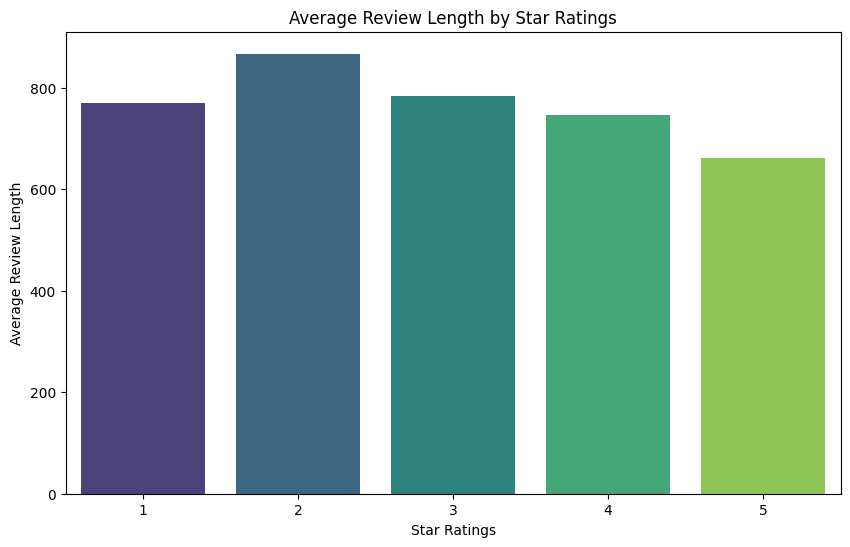

In [22]:
df['Review_Length'] = df['Review'].apply(len)

avg_review_length = df.groupby('Rating')['Review_Length'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Review_Length', data=avg_review_length, palette='viridis')
plt.title('Average Review Length by Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Average Review Length')
plt.show()

From the above visualization we can say that the customers who gave negative reviews have given the review with more words wrt length of the sentence.

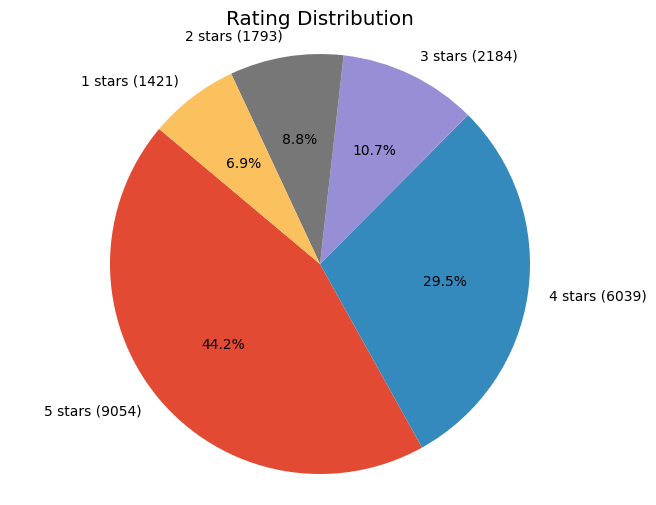

In [24]:
plt.style.use('ggplot')
import matplotlib.pyplot as plt

rating_counts = df['Rating'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=[f'{rating} stars ({count})' for rating, count in rating_counts.items()], autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution')
plt.axis('equal')
plt.show()


In [25]:
# Distribution of Target Variable
df['Sentiment'].value_counts(normalize=True)

Sentiment
Positive    0.736567
Negative    0.156849
Neutral     0.106583
Name: proportion, dtype: float64

## Step-1 - Identify Input and Output

In [26]:
df

,Review,Rating,Sentiment,Sentiment_Polarity,Review_Length
0,nice hotel expensive parking got good deal sta...,4,Positive,0.208744,593
1,ok nothing special charge diamond member hilto...,2,Negative,0.214923,1689
2,nice rooms not 4 experience hotel monaco seatt...,3,Neutral,0.294420,1425
3,"unique, great stay, wonderful time hotel monac...",5,Positive,0.504825,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,0.384615,1281
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,0.221729,733
20487,great location price view hotel great quick pl...,4,Positive,0.503704,306
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,0.171220,443
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,0.122573,5557


In [27]:
X = df.Review
y = df.Sentiment
print(X.shape, y.shape)

(20491,) (20491,)


#### Based on the reviews we must predict the sentiment. So, our input variable is 'Review' column and target variable is newly created column 'Sentiment'.

## Step-2 - Split the Data into train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15368,) (15368,)
(5123,) (5123,)


# Data Cleaning and Preprocessing on train and test data

In [29]:
def preprocess(text, flag, n=2):
    # remove special characters
    sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # convert sentence into lower case
    sentence = sentence.lower()
    # tokenize sentence into words
    tokens = sentence.split()

    # Remove 'not' from default English stopwords
    custom_stopwords = set(stopwords.words("english")) - {'not'}

    # remove stop words
    clean_tokens = [token for token in tokens if token not in custom_stopwords]

    # stemming/lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(token) for token in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]

    # Generate n-grams
    ngrams_list = list(ngrams(clean_tokens, n))
    ngrams_text = [' '.join(gram) for gram in ngrams_list]

    return pd.Series(' '.join(ngrams_text))

### Text Cleaning on train data

In [30]:
X_train.head()

17735    disapponted booked hotel reading reviews site ...
17912    want stay beirut, recently stayed vincci conda...
8684     loved hotel wife spent christmas europe time a...
943      literary gem just returned home stay hotel rex...
508      great new hotel hotel nice clean brand new.roo...
Name: Review, dtype: object

In [31]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [32]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [33]:
X_train_transformed = X_train.progress_apply(lambda x: preprocess(x, flag='lemma'))
X_train_transformed.head()

100%|██████████| 15368/15368 [00:18<00:00, 817.04it/s] 


,0
17735,disapponted booked booked hotel hotel reading ...
17912,want stay stay beirut beirut recently recently...
8684,loved hotel hotel wife wife spent spent christ...
943,literary gem gem returned returned home home s...
508,great new new hotel hotel hotel hotel nice nic...


In [34]:
X_train_transformed.columns = ['Clean Review text']

X_train_transformed.head()

,Clean Review text
17735,disapponted booked booked hotel hotel reading ...
17912,want stay stay beirut beirut recently recently...
8684,loved hotel hotel wife wife spent spent christ...
943,literary gem gem returned returned home home s...
508,great new new hotel hotel hotel hotel nice nic...


### Text cleaning on test data

In [35]:
X_test.head()

1706     excellent true 5 star honest review, wife visi...
6762     fantastic vacation, vacationed punta cana gran...
19004    good location good hotel taken surprise weeken...
20184    intercontinental century city details recently...
20113    great time wow, great week, friendly staff gre...
Name: Review, dtype: object

In [36]:
X_test_transformed= X_test.progress_apply(lambda x: preprocess(x, flag='lemma'))
X_test_transformed.head()

100%|██████████| 5123/5123 [00:06<00:00, 844.99it/s]


,0
1706,excellent true true star star honest honest re...
6762,fantastic vacation vacation vacationed vacatio...
19004,good location location good good hotel hotel t...
20184,intercontinental century century city city det...
20113,great time time wow wow great great week week ...


In [37]:
X_test_transformed.columns = ['Clean Review text']

X_test_transformed.head()

,Clean Review text
1706,excellent true true star star honest honest re...
6762,fantastic vacation vacation vacationed vacatio...
19004,good location location good good hotel hotel t...
20184,intercontinental century century city city det...
20113,great time time wow wow great great week week ...


# Text Embedding

#### Bag of words(BOW)

In [38]:
vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train_transformed['Clean Review text'])

print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 38719
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (15368, 38719)


In [39]:
X_test_bow = vocab.transform(X_test_transformed['Clean Review text'])

In [40]:
X_test_bow.shape

(5123, 38719)

### TF-IDF

In [41]:
vectorizer = TfidfVectorizer()

X_train_dtm = vectorizer.fit_transform(X_train_transformed['Clean Review text'])

X_train_dtm.shape

(15368, 38719)

In [42]:
X_test_dtm = vectorizer.transform(X_test_transformed['Clean Review text'])

X_test_dtm.shape

(5123, 38719)

## Step 5 - Building a Model (i.e. Train the classifier)

## Training Model using Bag-of-Words

In [43]:
lr_bow = LogisticRegression()
lr_bow.fit(X_train_bow,y_train)

LogisticRegression()

In [44]:
knn_bow = KNeighborsClassifier()
knn_bow.fit(X_train_bow,y_train)

KNeighborsClassifier()

In [45]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow,y_train)

MultinomialNB()

In [46]:
dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_train_bow,y_train)

DecisionTreeClassifier()

In [47]:
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow,y_train)

RandomForestClassifier()

## Assessing Model Performance using Bag-of-Words

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.9980478917230609

Test accuracy:  0.8340815928167089

Confusion Matrix - Train:
[[ 2363     0     3]
 [    2  1635    25]
 [    0     0 11340]]


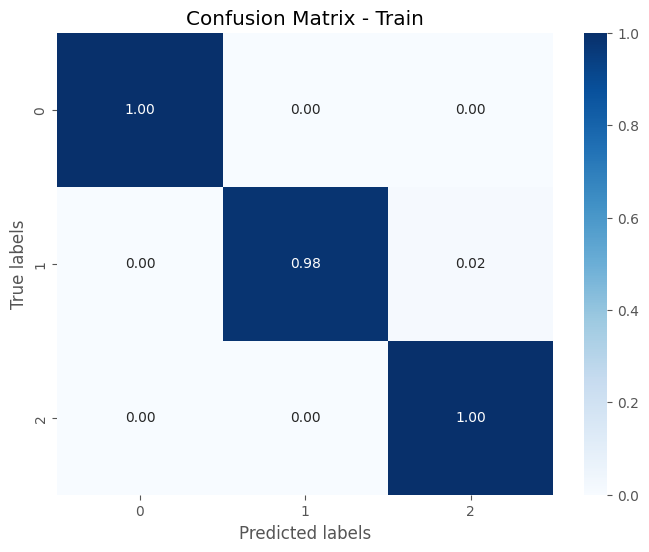

Confusion Matrix - Test:
[[ 647  119   82]
 [ 133  176  213]
 [  84  219 3450]]


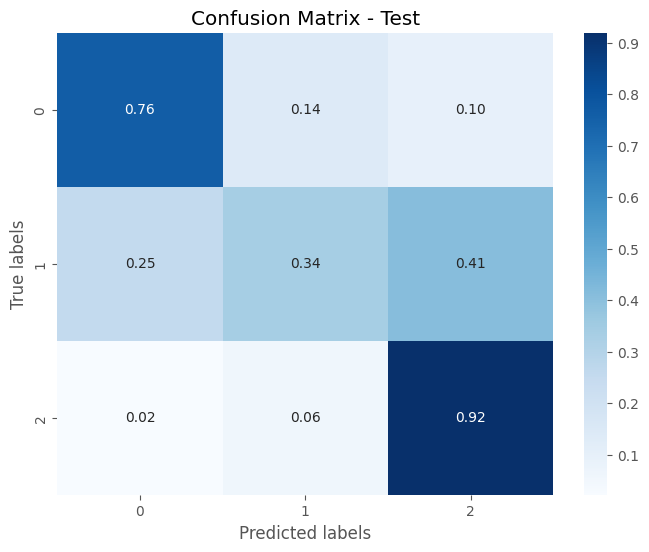

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2366
     Neutral       1.00      0.98      0.99      1662
    Positive       1.00      1.00      1.00     11340

    accuracy                           1.00     15368
   macro avg       1.00      0.99      1.00     15368
weighted avg       1.00      1.00      1.00     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.76       848
     Neutral       0.34      0.34      0.34       522
    Positive       0.92      0.92      0.92      3753

    accuracy                           0.83      5123
   macro avg       0.67      0.67      0.67      5123
weighted avg       0.83      0.83      0.83      5123


Precision - Train: 0.9980523243005778
Precision - Test: 0.8337161125443412

Recall - Train: 0.9980478917230609
Recall - Test: 0.8340815928167089

F1 Score - Train: 0.998041786

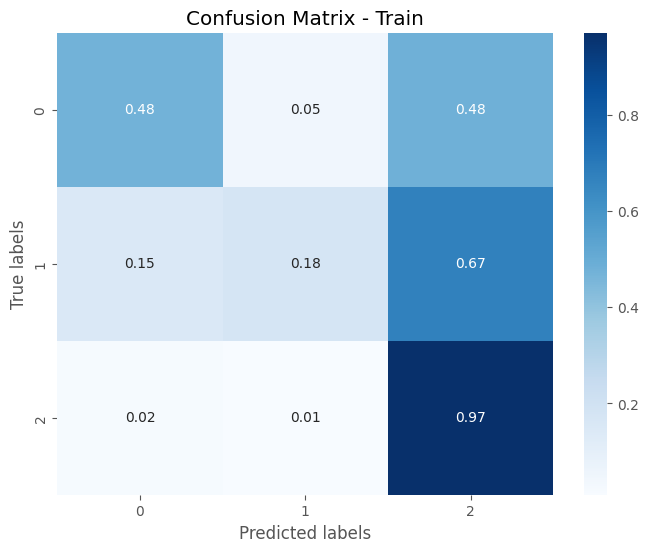

Confusion Matrix - Test:
[[ 290   54  504]
 [  75   30  417]
 [ 129   65 3559]]


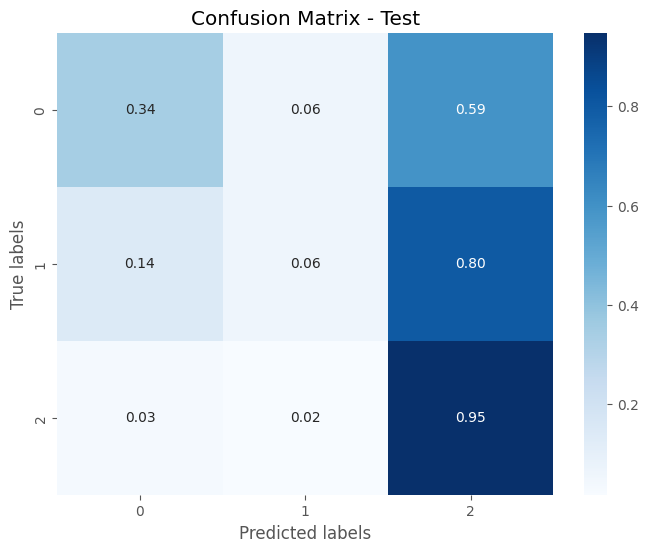

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.71      0.48      0.57      2366
     Neutral       0.57      0.18      0.27      1662
    Positive       0.83      0.97      0.90     11340

    accuracy                           0.81     15368
   macro avg       0.70      0.54      0.58     15368
weighted avg       0.78      0.81      0.78     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.59      0.34      0.43       848
     Neutral       0.20      0.06      0.09       522
    Positive       0.79      0.95      0.86      3753

    accuracy                           0.76      5123
   macro avg       0.53      0.45      0.46      5123
weighted avg       0.70      0.76      0.71      5123


Precision - Train: 0.7833228509811434
Precision - Test: 0.6996625719238694

Recall - Train: 0.8087584591358667
Recall - Test: 0.7571735311341011

F1 Score - Train: 0.777359120

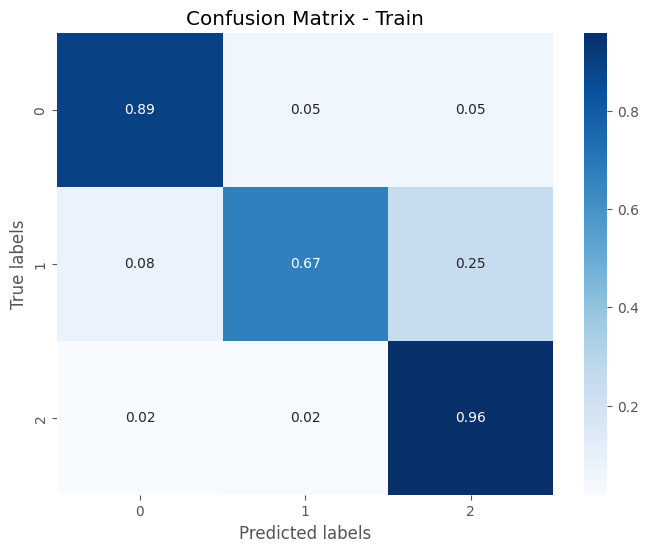

Confusion Matrix - Test:
[[ 657  106   85]
 [  97  126  299]
 [  80  116 3557]]


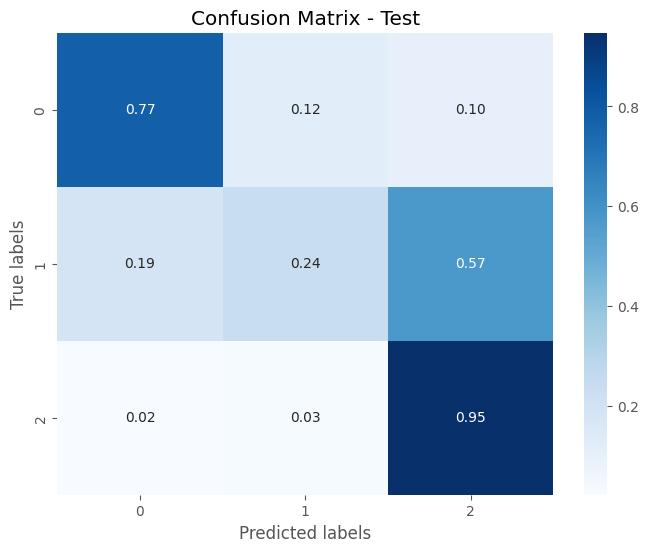

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.88      2366
     Neutral       0.75      0.67      0.71      1662
    Positive       0.95      0.96      0.96     11340

    accuracy                           0.92     15368
   macro avg       0.85      0.84      0.85     15368
weighted avg       0.92      0.92      0.92     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       848
     Neutral       0.36      0.24      0.29       522
    Positive       0.90      0.95      0.92      3753

    accuracy                           0.85      5123
   macro avg       0.68      0.65      0.67      5123
weighted avg       0.83      0.85      0.84      5123


Precision - Train: 0.9163228369826337
Precision - Test: 0.8284885751181648

Recall - Train: 0.9180114523685581
Recall - Test: 0.8471598672652743

F1 Score - Train: 0.916884213

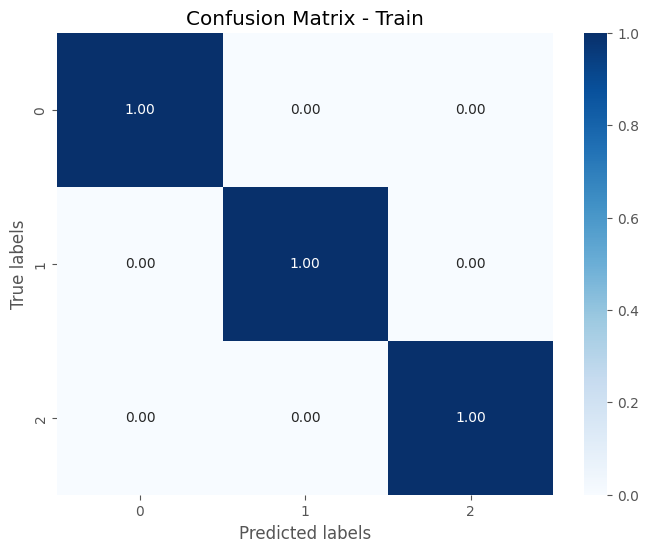

Confusion Matrix - Test:
[[ 448  122  278]
 [ 115   88  319]
 [ 208  231 3314]]


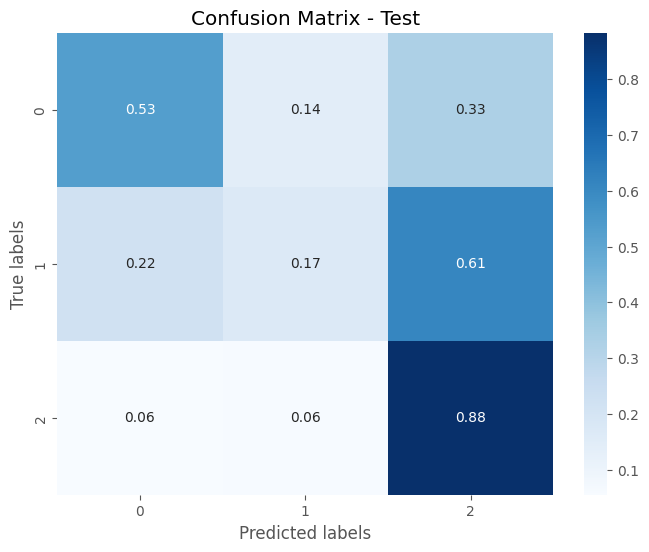

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2366
     Neutral       1.00      1.00      1.00      1662
    Positive       1.00      1.00      1.00     11340

    accuracy                           1.00     15368
   macro avg       1.00      1.00      1.00     15368
weighted avg       1.00      1.00      1.00     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.58      0.53      0.55       848
     Neutral       0.20      0.17      0.18       522
    Positive       0.85      0.88      0.86      3753

    accuracy                           0.75      5123
   macro avg       0.54      0.53      0.53      5123
weighted avg       0.74      0.75      0.74      5123


Precision - Train: 1.0
Precision - Test: 0.7372678679107278

Recall - Train: 1.0
Recall - Test: 0.7515127854772594

F1 Score - Train: 1.0
F1 Score - Test: 0.7437805714552158



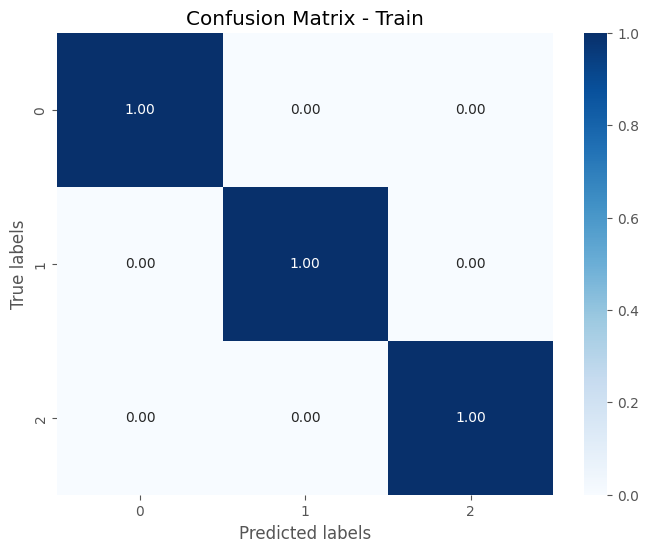

Confusion Matrix - Test:
[[ 299    0  549]
 [  13    0  509]
 [   2    0 3751]]


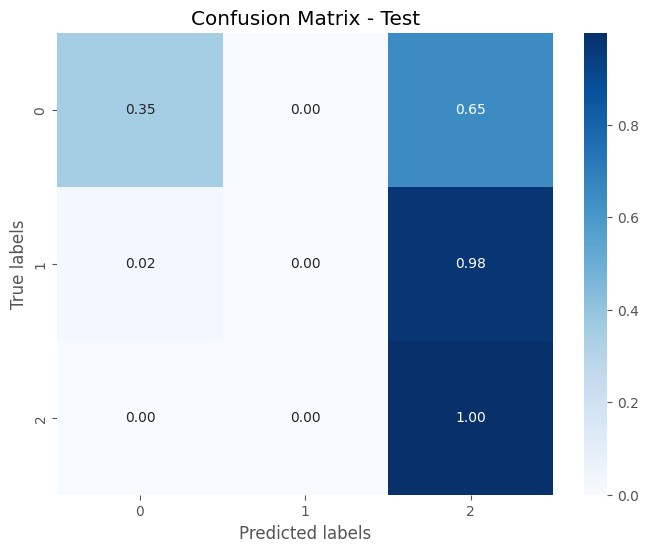

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2366
     Neutral       1.00      1.00      1.00      1662
    Positive       1.00      1.00      1.00     11340

    accuracy                           1.00     15368
   macro avg       1.00      1.00      1.00     15368
weighted avg       1.00      1.00      1.00     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.95      0.35      0.51       848
     Neutral       0.00      0.00      0.00       522
    Positive       0.78      1.00      0.88      3753

    accuracy                           0.79      5123
   macro avg       0.58      0.45      0.46      5123
weighted avg       0.73      0.79      0.73      5123


Precision - Train: 1.0
Precision - Test: 0.7290288576274278

Recall - Train: 1.0
Recall - Test: 0.7905524106968573

F1 Score - Train: 1.0
F1 Score - Test: 0.7270689246356802



In [48]:
models = [lr_bow,knn_bow,nb_bow,dt_bow,rf_bow]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_bow)
    y_test_pred = model.predict(X_test_bow)

    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()

    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()

    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()

    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()

    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()

    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()

    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()

    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()

    print('-'*50)

## Training Model using TF-IDF

In [49]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_dtm,y_train)

LogisticRegression()

In [50]:
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(X_train_dtm,y_train)

KNeighborsClassifier()

In [51]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_dtm,y_train)

MultinomialNB()

In [52]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [53]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_dtm,y_train)

RandomForestClassifier()

## Assessing Model Performance using TF-IDF

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.9059083810515357

Test accuracy:  0.8666796798750732

Confusion Matrix - Train:
[[ 2069    41   256]
 [  204   594   864]
 [   50    31 11259]]


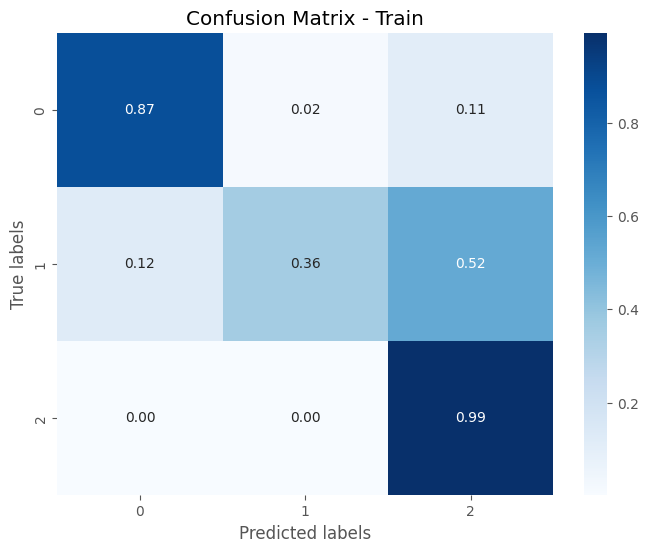

Confusion Matrix - Test:
[[ 667   48  133]
 [ 107   99  316]
 [  32   47 3674]]


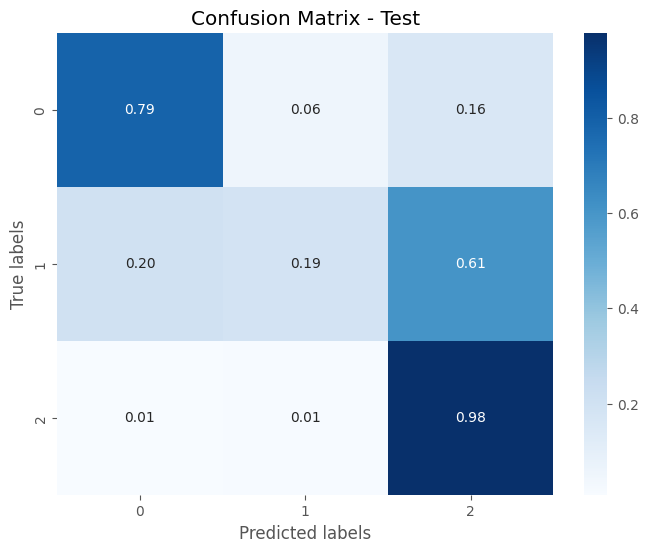

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      2366
     Neutral       0.89      0.36      0.51      1662
    Positive       0.91      0.99      0.95     11340

    accuracy                           0.91     15368
   macro avg       0.90      0.74      0.78     15368
weighted avg       0.90      0.91      0.89     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.83      0.79      0.81       848
     Neutral       0.51      0.19      0.28       522
    Positive       0.89      0.98      0.93      3753

    accuracy                           0.87      5123
   macro avg       0.74      0.65      0.67      5123
weighted avg       0.84      0.87      0.85      5123


Precision - Train: 0.9047128453726664
Precision - Test: 0.8417785951092824

Recall - Train: 0.9059083810515357
Recall - Test: 0.8666796798750732

F1 Score - Train: 0.891587207

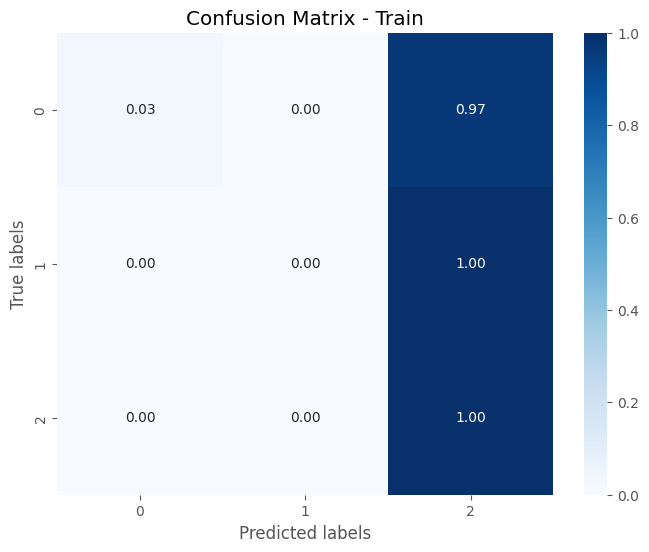

Confusion Matrix - Test:
[[   7    0  841]
 [   0    0  522]
 [   0    0 3753]]


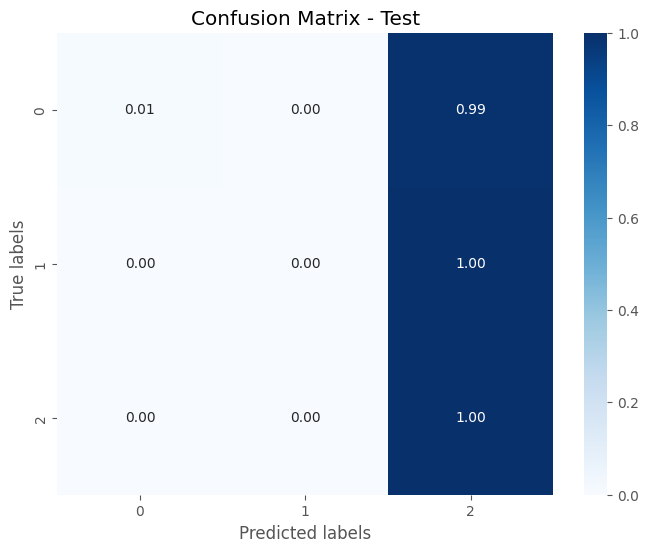

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.06      2366
     Neutral       1.00      0.00      0.00      1662
    Positive       0.74      1.00      0.85     11340

    accuracy                           0.74     15368
   macro avg       0.91      0.34      0.31     15368
weighted avg       0.81      0.74      0.64     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       1.00      0.01      0.02       848
     Neutral       0.00      0.00      0.00       522
    Positive       0.73      1.00      0.85      3753

    accuracy                           0.73      5123
   macro avg       0.58      0.34      0.29      5123
weighted avg       0.70      0.73      0.62      5123


Precision - Train: 0.809408400067429
Precision - Test: 0.7029336721651288

Recall - Train: 0.7430374804789173
Recall - Test: 0.7339449541284404

F1 Score - Train: 0.6384261088

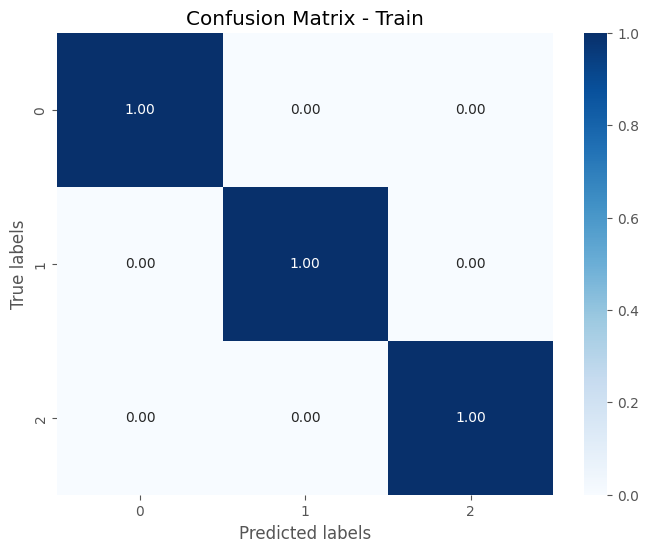

Confusion Matrix - Test:
[[ 428  129  291]
 [ 123   85  314]
 [ 266  267 3220]]


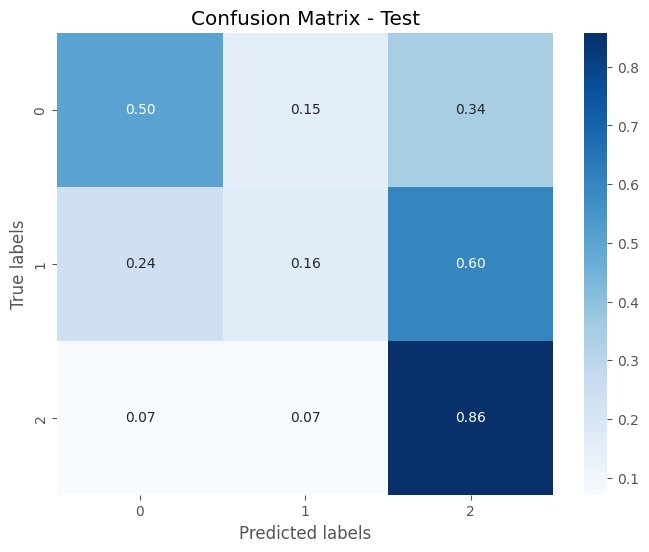

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2366
     Neutral       1.00      1.00      1.00      1662
    Positive       1.00      1.00      1.00     11340

    accuracy                           1.00     15368
   macro avg       1.00      1.00      1.00     15368
weighted avg       1.00      1.00      1.00     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.52      0.50      0.51       848
     Neutral       0.18      0.16      0.17       522
    Positive       0.84      0.86      0.85      3753

    accuracy                           0.73      5123
   macro avg       0.51      0.51      0.51      5123
weighted avg       0.72      0.73      0.72      5123


Precision - Train: 1.0
Precision - Test: 0.7214275736131609

Recall - Train: 1.0
Recall - Test: 0.7286746047237946

F1 Score - Train: 1.0
F1 Score - Test: 0.7249364670724042



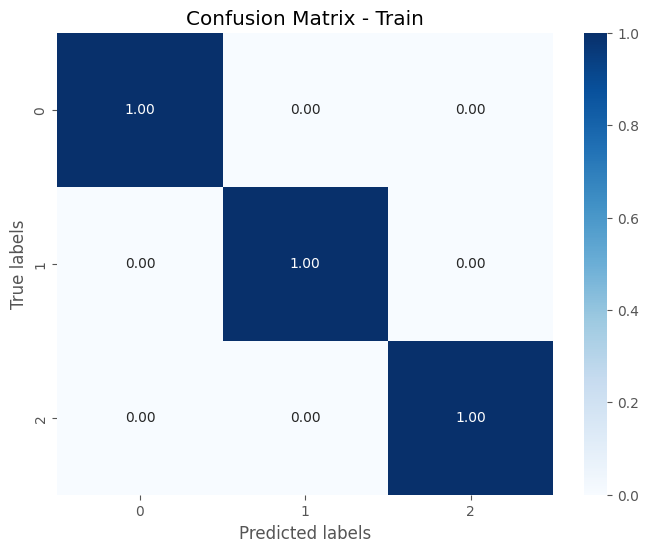

Confusion Matrix - Test:
[[ 311    0  537]
 [  12    0  510]
 [   3    0 3750]]


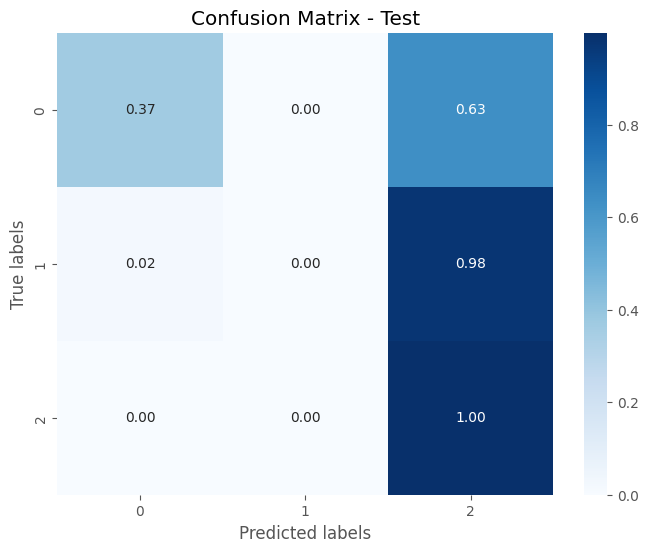

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2366
     Neutral       1.00      1.00      1.00      1662
    Positive       1.00      1.00      1.00     11340

    accuracy                           1.00     15368
   macro avg       1.00      1.00      1.00     15368
weighted avg       1.00      1.00      1.00     15368


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.95      0.37      0.53       848
     Neutral       0.00      0.00      0.00       522
    Positive       0.78      1.00      0.88      3753

    accuracy                           0.79      5123
   macro avg       0.58      0.46      0.47      5123
weighted avg       0.73      0.79      0.73      5123


Precision - Train: 1.0
Precision - Test: 0.7305966251540615

Recall - Train: 1.0
Recall - Test: 0.7926995900839352

F1 Score - Train: 1.0
F1 Score - Test: 0.7303116052015427



In [54]:
models = [lr_tfidf,nb_tfidf,dt_tfidf,rf_tfidf]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_dtm)
    y_test_pred = model.predict(X_test_dtm)

    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()

    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()

    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()

    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()

    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()

    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()

    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()

    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()

    print('-'*50)

## Step 6 - Evaluation

In [82]:
pipelines = {
    'DecisionTrees': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'NaiveBayes': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', MultinomialNB())
    ]),
}

param_grids = {
    'DecisionTrees': {
        'Vectorization': [TfidfVectorizer()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'LogisticRegression': {
        'Vectorization': [TfidfVectorizer()],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'NaiveBayes': {
        'Vectorization': [TfidfVectorizer()],
    },
}

best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train, y_train)

    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))

    best_models[algo] = grid_search.best_estimator_
    print()


********** DecisionTrees **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 8min 28s, sys: 892 ms, total: 8min 29s
Wall time: 8min 43s
Train Score:  0.7676341531939885
Test Score:  0.7809877025180558

********** LogisticRegression **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 59s, sys: 374 ms, total: 1min 59s
Wall time: 2min
Train Score:  0.8582766856629647
Test Score:  0.8686316611360531

********** NaiveBayes **********
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 17.9 s, sys: 44 ms, total: 17.9 s
Wall time: 18 s
Train Score:  0.7384175265884302
Test Score:  0.7333593597501464



In [68]:
import pickle

In [69]:
pipe = Pipeline(["vectorizer", vectorizer,
                "rf_tfidf",rf_tfidf])

In [70]:
pickle.dump(pipe, open('pipe.pkl','wb'))

In [71]:
import pickle

file_path = "rf_tfidf.pkl"

with open(file_path, "wb") as file:
    pickle.dump(rf_tfidf, file)

In [83]:
with open("rf_tfidf.pkl", "rb") as file:
    rf_tfidf_model = pickle.load(file)


dummy_test_data = ['nice hotel']
dummy_test_data_tfidf = vectorizer.transform(dummy_test_data)
predictions = rf_tfidf.predict(dummy_test_data_tfidf)


print("Predictions:", predictions)

Predictions: ['Positive']


In [84]:
pickle.dump(vectorizer, open('vector.pkl','wb'))

In [85]:
mod = pickle.load( open('rf_tfidf.pkl','rb'))

In [86]:
vec = pickle.load( open('vector.pkl','rb'))

In [87]:
X_train

17735    disapponted booked hotel reading reviews site ...
17912    want stay beirut, recently stayed vincci conda...
8684     loved hotel wife spent christmas europe time a...
943      literary gem just returned home stay hotel rex...
508      great new hotel hotel nice clean brand new.roo...
                               ...                        
6175     doubtful return stayed park shore 2 times year...
9704     fantastic, spent week swissotel dam square mar...
11190    enjoyed stay, occidental 4 days 3 nights labor...
9256     nice location decent price better value barcel...
8787     no prob die port van cleve 10 minute walk cent...
Name: Review, Length: 15368, dtype: object

In [90]:
c = vec.transform(X_train)

In [91]:
model = pickle.load( open('pipe.pkl','rb'))

In [92]:
xdata = pickle.dump(X_train, open('xdata.pkl','wb'))

In [93]:
ydata = pickle.dump(y_train, open('ydata.pkl','wb'))